In [1]:
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("FINALFINAL.csv", low_memory=False)

In [3]:
data

,time_elapsed,ino,state,flag,ops_per_sec,distance_from_mean,cumulative_time_elapsed,time_difference,workload_type
0,-0.187062,0.432535,-0.033807,-0.003553,0.603335,-0.187062,0.496030,-0.002248,4
1,-0.181245,-0.431407,-0.033807,-0.003554,-1.003513,-0.181245,-1.607346,0.004003,2
2,-0.187059,-0.431407,-0.033807,-0.003554,0.540562,-0.187059,0.417695,-0.006696,2
3,-0.187045,0.432535,-0.033807,-0.003553,0.345057,-0.187045,0.511771,-0.079333,4
4,-0.187096,-0.723851,-0.033807,-0.003553,1.553668,-0.187096,0.514653,-0.000118,4
...,...,...,...,...,...,...,...,...,...
1425427,-0.186935,0.432535,-0.033807,-0.003553,-0.345303,-0.186935,0.539052,0.000134,4
1425428,-0.184375,0.432535,-0.033807,-0.003553,-0.975072,-0.184375,0.538385,0.001783,4
1425429,-0.186925,0.432535,-0.033807,-0.003553,-0.375921,-0.186925,0.530154,0.000138,4
1425430,-0.185374,0.432535,-0.033807,-0.003553,-0.944959,-0.185374,0.489804,0.001102,4


In [9]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [10]:
#split dataset in features and target variable
feature_cols = ['time_elapsed', 'ino', 'state', 'flag','ops_per_sec','distance_from_mean','cumulative_time_elapsed', 'time_difference']
X = data[feature_cols] # Features
y = data.workload_type # Target variable

In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9999976615298272


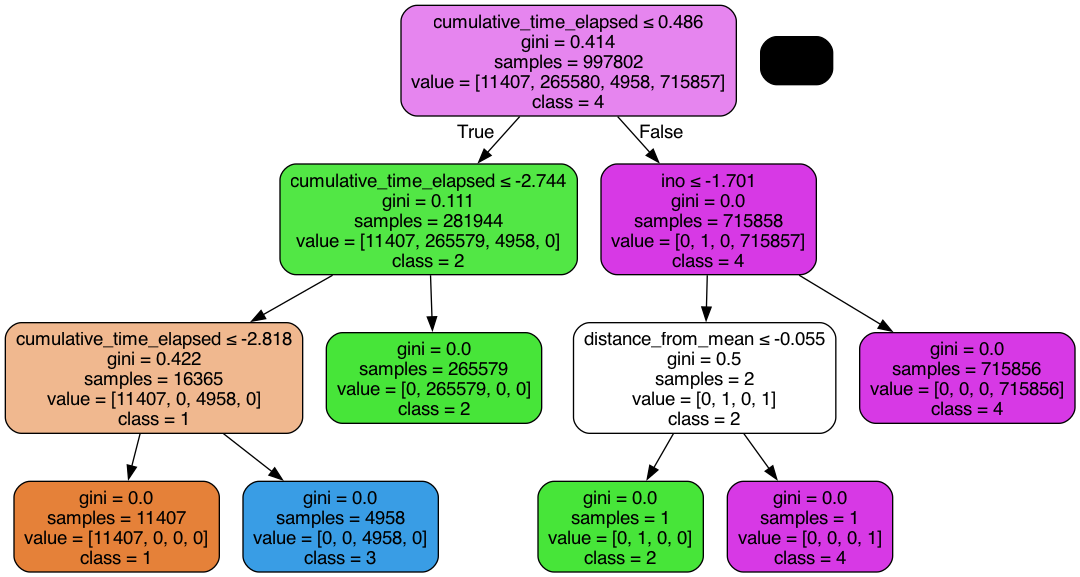

In [23]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1', '2', '3', '4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dt.png')
Image(graph.create_png())